# Objective:

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

### Import all the necessary libraries

In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [32]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
data_label=data['Species']
data.drop(["Id","Species"],inplace=True,axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Observation:** This is our dataset that we need to cluster. We have removed the labels so this can come under unsupervised learning.

In [34]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


**Observation:**  As we can see they are no null values present in the data set there is no requirement of data preprocessing.

## K-Means Clustering:

The main issue is that we dont know how many clusters are to be formed from the given data. To get the correct number of clusters we will be using **elbow method**.

In [43]:
def get_optimal_clusters_elbow_method(x):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                        max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid()
    plt.show()

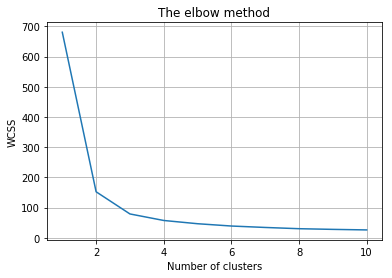

In [44]:
get_optimal_clusters_elbow_method(data)

**Observation:** We can see from the above elbow method that three is the optimal number of clusters required for our K-means clustering.

## Train our model with the optimal clusters.

In [48]:
model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_preds = model.fit_predict(data)

In [55]:
data=np.array(data)

## Visualizing our K-Means Clustering Model

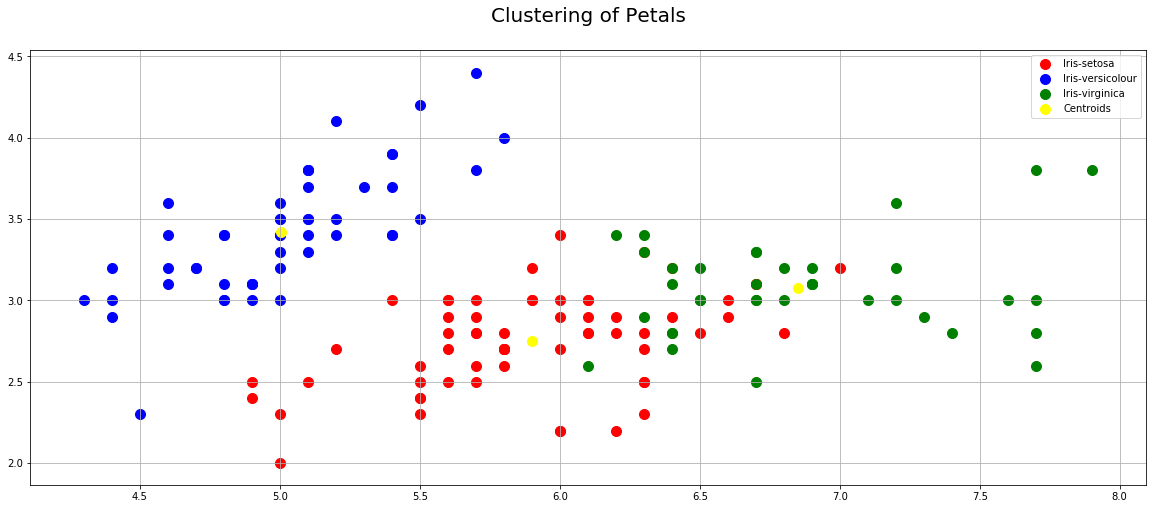

In [59]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(20,8))
plt.scatter(data[y_preds == 0, 0], data[y_preds == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data[y_preds == 1, 0], data[y_preds == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[y_preds == 2, 0], data[y_preds == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clustering of Petals' '\n', color='black',size = 20)
plt.grid()
plt.legend()

# Conclusion:
- This shows how K-Means has clustured the data into three different clusters perfectly.